# SkillFactory
## Введение в ML, введение в sklearn
#### ЧЕРНОВИК 2 ЗАДАНИЯ, ЕЩЁ В ПРОЦЕССЕ. ПОСТАРАЮСЬ ДОДЕЛАТЬ НА НЕДЕЛЕ ЭТО И ОСТАЛЬНЫЕ

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [31]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [32]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [33]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [34]:
df_train.shape

(15223, 52)

In [35]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [36]:
df_test.shape

(14910, 52)

In [37]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [38]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [39]:
df = df_test.append(df_train).reset_index(drop=True)

In [40]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [42]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее специальное', 'Ученая степень', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Образование', 'Подбор персонала', 'Энергетика', 'Ресторанный бизнес/Общественное питание', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Туризм', 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'ЧОП/Детективная д-ть', 'Транспорт', 'Страхование', 'Развлечения/Искусство', 'Нефтегазовая промышленность', 'Недвижимость', 'Салоны красоты и здоровья', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'Информационные технологии', 'Сборочные производства', 'Сельское хозяйство', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы', 'Государственная служба', 'Логистика', 'Другие сферы', 'Управляющая компания', 'Торговля', 'Строительство', 'СМИ/Реклама/PR-агенства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [43]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Провести исследование df.describe(), увидеть колонки в которых данных меньше, чем в остальных.
Возможны варианты где мы заполняем пустоты значением медианы

In [44]:
# Выводим список колонок, в которых количество данных меньше, чем число строк data frame 
# для числовых данных
missing_data_in = [c for c in df.columns if df[c].dtype.name !='object' if df[c].count()<len(df)]
missing_data_in

['WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED']

In [45]:
# Проверим вручную
df.describe().T
# PREVIOUS_CARD_NUM_UTILIZED 	600.0
# WORK_TIME 	27416.0

,count,mean,std,min,25%,50%,75%,max
AGREEMENT_RK,30133.0,6.540639e+07,4.575893e+06,59909969.0,61921011.0,64365821.0,67086107.0,75292243.0
TARGET,30133.0,1.182093e-01,3.228611e-01,0.0,0.0,0.0,0.0,1.0
AGE,30133.0,4.042458e+01,1.161479e+01,21.0,30.0,39.0,50.0,67.0
SOCSTATUS_WORK_FL,30133.0,9.091362e-01,2.874201e-01,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,30133.0,1.334749e-01,3.400929e-01,0.0,0.0,0.0,0.0,1.0
GENDER,30133.0,6.552949e-01,4.752799e-01,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,30133.0,1.094249e+00,9.873811e-01,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,30133.0,6.426841e-01,8.091837e-01,0.0,0.0,0.0,1.0,7.0
REG_FACT_FL,30133.0,8.365911e-01,3.697445e-01,0.0,1.0,1.0,1.0,1.0
FACT_POST_FL,30133.0,9.490924e-01,2.198128e-01,0.0,1.0,1.0,1.0,1.0


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [46]:
# Разделим данные на категориальные и числовые
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
# categorical_columns
print (categorical_columns)
print('\n')
print (numerical_columns)

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'sample']


['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'TERM', 'DL_DOCUMENT_FL', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'PREVIOUS_CARD_NUM_UTILIZED']


In [47]:
# первый способ получить некоторую общую информацию по категориальным признакам:
df[categorical_columns].describe()

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,sample
count,30133,30133,27420,27420,27420,27425,27420,30133,30133,30133,30133,30133,29543,30131,30133,30133,30133,30133,30133
unique,7,5,31,12,5,2,10,5,373,82,83,82,70,11,12911,4655,1942,1669,2
top,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,10000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,3000,0,0,0,train
freq,12869,18465,4707,13981,12896,27099,22613,13999,3523,1307,1313,1311,1537,4248,168,2372,26382,26382,15223


In [48]:
# второй способ получить ту же самую таблицу:
df.describe(include=[object])

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,sample
count,30133,30133,27420,27420,27420,27425,27420,30133,30133,30133,30133,30133,29543,30131,30133,30133,30133,30133,30133
unique,7,5,31,12,5,2,10,5,373,82,83,82,70,11,12911,4655,1942,1669,2
top,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,10000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,3000,0,0,0,train
freq,12869,18465,4707,13981,12896,27099,22613,13999,3523,1307,1313,1311,1537,4248,168,2372,26382,26382,15223


In [49]:
# Определить полный перечень значений категориальных признаков можно, например, так:
for c in categorical_columns:
    print (df[c].unique())

['Среднее специальное' 'Среднее' 'Высшее' 'Неполное среднее'
 'Неоконченное высшее' 'Два и более высших образования' 'Ученая степень']
['Не состоял в браке' 'Состою в браке' 'Разведен(а)' 'Вдовец/Вдова'
 'Гражданский брак']
['Образование' nan 'Металлургия/Промышленность/Машиностроение'
 'Другие сферы' 'Сборочные производства' 'Торговля' 'Строительство'
 'Ресторанный бизнес/Общественное питание' 'Нефтегазовая промышленность'
 'Транспорт' 'Здравоохранение' 'Государственная служба' 'Наука'
 'Развлечения/Искусство' 'ЧОП/Детективная д-ть'
 'Коммунальное хоз-во/Дорожные службы' 'Сельское хозяйство' 'Энергетика'
 'Информационные технологии' 'Управляющая компания' 'Банк/Финансы'
 'Юридические услуги/нотариальные услуги' 'Салоны красоты и здоровья'
 'Информационные услуги' 'Химия/Парфюмерия/Фармацевтика' 'Страхование'
 'СМИ/Реклама/PR-агенства' 'Недвижимость' 'Логистика' 'Туризм'
 'Подбор персонала' 'Маркетинг']
['Специалист' nan 'Рабочий' 'Руководитель среднего звена'
 'Индивидуальный предприн

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [51]:
# таблица содержит пропуски NaN
df[missing_data_in].head(5)

,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,39.0,NaN
1,NaN,NaN
2,156.0,NaN
3,9.0,NaN
4,84.0,NaN


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001536FAFD940>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

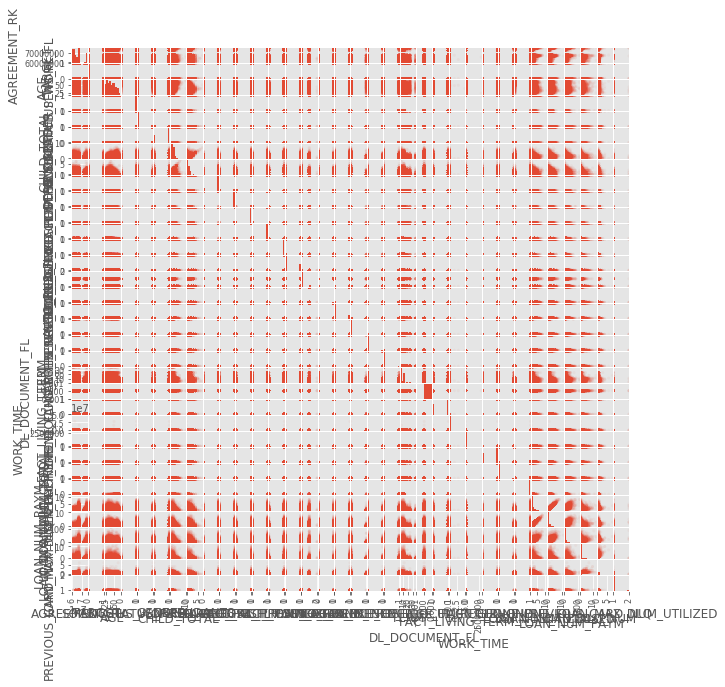

In [52]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(10, 10))

Из построенных диаграмм видно, что признаки не сильно коррелируют между собой, что впрочем можно также легко установить, посмотрев на корреляционную матрицу. Все ее недиагональные значения по модулю не превосходят 0.4:

In [53]:
df.corr()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,...,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,PREVIOUS_CARD_NUM_UTILIZED
AGREEMENT_RK,1.000000,0.006183,-0.021908,-0.011135,0.014151,0.042110,0.004972,0.017962,0.006287,-0.036000,...,0.000018,0.007808,-0.039388,-0.010903,0.323576,0.301865,0.283715,0.015624,0.009433,0.099690
TARGET,0.006183,1.000000,-0.099531,0.084637,-0.086877,-0.022527,0.005131,0.054339,-0.042518,-0.004053,...,-0.002757,-0.034542,0.002693,0.085088,-0.021647,-0.053871,-0.020107,0.054491,0.076208,-0.057639
AGE,-0.021908,-0.099531,1.000000,-0.453050,0.557366,0.137661,0.201650,-0.292471,0.228178,0.143122,...,-0.005362,0.094690,-0.012580,-0.450951,0.025198,-0.000848,0.034832,-0.010398,-0.043413,-0.068288
SOCSTATUS_WORK_FL,-0.011135,0.084637,-0.453050,1.000000,-0.805512,-0.094700,-0.049460,0.201723,-0.098187,-0.055358,...,0.000113,0.000707,0.026257,0.995171,0.034138,0.041351,0.030191,0.010670,0.019926,0.025788
SOCSTATUS_PENS_FL,0.014151,-0.086877,0.557366,-0.805512,1.000000,0.122863,0.064727,-0.249495,0.113547,0.068256,...,-0.000449,0.022759,-0.021531,-0.801606,-0.005397,-0.018801,0.001549,-0.003800,-0.017924,-0.035436
GENDER,0.042110,-0.022527,0.137661,-0.094700,0.122863,1.000000,0.049713,-0.076494,0.073968,0.035014,...,0.005086,0.029874,0.003631,-0.093927,0.010806,0.013912,0.023984,0.013686,0.011527,-0.002194
CHILD_TOTAL,0.004972,0.005131,0.201650,-0.049460,0.064727,0.049713,1.000000,0.513394,0.071186,0.049019,...,-0.006214,-0.011168,-0.024506,-0.049297,0.039200,0.008112,0.040559,0.019575,0.009589,-0.040090
DEPENDANTS,0.017962,0.054339,-0.292471,0.201723,-0.249495,-0.076494,0.513394,1.000000,-0.041421,-0.021666,...,-0.005578,-0.045789,-0.016987,0.200719,0.065705,0.051847,0.059872,0.021818,0.026121,-0.005155
REG_FACT_FL,0.006287,-0.042518,0.228178,-0.098187,0.113547,0.073968,0.071186,-0.041421,1.000000,0.518722,...,0.003499,0.064879,-0.034702,-0.097731,0.019136,0.010572,0.022728,-0.005847,-0.017524,-0.068689
FACT_POST_FL,-0.036000,-0.004053,0.143122,-0.055358,0.068256,0.035014,0.049019,-0.021666,0.518722,1.000000,...,0.001848,0.035123,-0.032363,-0.054969,-0.044650,-0.048837,-0.039436,-0.016153,-0.017610,-0.055410


Можно выбрать любую пару признаков и нарисовать диаграмму рассеяния для этой пары признаков, изображая точки, соответствующие объектам из разных классов разным цветом: + – красный, - – синий. 
Например, для пары признаков WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED получаем следующую диаграмму:

In [54]:
# col1 = 'WORK_TIME'
# col2 = 'PREVIOUS_CARD_NUM_UTILIZED'

# plt.figure(figsize=(10, 6))

# plt.scatter(df[col1][df['class'] == '+'],
#             df[col2][df['class'] == '+'],
#             alpha=0.75,
#             color='red',
#             label='+')

# plt.scatter(df[col1][df['class'] == '-'],
#             df[col2][df['class'] == '-'],
#             alpha=0.75,
#             color='blue',
#             label='-')

# plt.xlabel(col1)
# plt.ylabel(col2)
# plt.legend(loc='best');

Из диаграммы, в частности, видно, что признак (WORK_TIME or PREVIOUS_CARD_NUM_UTILIZED) является существенным: как правило, красные точки имеют большое значение этого признака, а синие – маленькое. Иными словами, визуально наблюдается хорошая корреляция между признаками (WORK_TIME or PREVIOUS_CARD_NUM_UTILIZED) и class. Признак (WORK_TIME or PREVIOUS_CARD_NUM_UTILIZED), напротив, несет гораздо меньше информации о принадлежности объекта интересующему нас классу.

Можно попробовать изобразить такие диаграммы рассеяния для других пар признаков и проанализировать их значимость.


#### Готовим данные

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [55]:
df.count(axis=0)

AGREEMENT_RK                  30133
TARGET                        30133
AGE                           30133
SOCSTATUS_WORK_FL             30133
SOCSTATUS_PENS_FL             30133
GENDER                        30133
CHILD_TOTAL                   30133
DEPENDANTS                    30133
EDUCATION                     30133
MARITAL_STATUS                30133
GEN_INDUSTRY                  27420
GEN_TITLE                     27420
ORG_TP_STATE                  27420
ORG_TP_FCAPITAL               27425
JOB_DIR                       27420
FAMILY_INCOME                 30133
PERSONAL_INCOME               30133
REG_ADDRESS_PROVINCE          30133
FACT_ADDRESS_PROVINCE         30133
POSTAL_ADDRESS_PROVINCE       30133
TP_PROVINCE                   29543
REGION_NM                     30131
REG_FACT_FL                   30133
FACT_POST_FL                  30133
REG_POST_FL                   30133
REG_FACT_POST_FL              30133
REG_FACT_POST_TP_FL           30133
FL_PRESENCE_FL              

Если данные содержат пропущенные значения, то имеется две простые альтернативы:

 -     удалить столбцы с такими значениями (df = df.dropna(axis=1)),
 -     удалить строки с такими значениями (df = df.dropna(axis=0)).
    
После этого, к сожалению, данных может стать совсем мало, поэтому рассмотрим простые альтернативные способы.

#### Количественные признаки

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.
 - axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [56]:
df = df.fillna(df.median(axis=0), axis=0)

Проверим, что теперь все столбцы, соответствующие количественным признакам, заполнены.

In [57]:
df.count(axis=0)

AGREEMENT_RK                  30133
TARGET                        30133
AGE                           30133
SOCSTATUS_WORK_FL             30133
SOCSTATUS_PENS_FL             30133
GENDER                        30133
CHILD_TOTAL                   30133
DEPENDANTS                    30133
EDUCATION                     30133
MARITAL_STATUS                30133
GEN_INDUSTRY                  27420
GEN_TITLE                     27420
ORG_TP_STATE                  27420
ORG_TP_FCAPITAL               27425
JOB_DIR                       27420
FAMILY_INCOME                 30133
PERSONAL_INCOME               30133
REG_ADDRESS_PROVINCE          30133
FACT_ADDRESS_PROVINCE         30133
POSTAL_ADDRESS_PROVINCE       30133
TP_PROVINCE                   29543
REGION_NM                     30131
REG_FACT_FL                   30133
FACT_POST_FL                  30133
REG_POST_FL                   30133
REG_FACT_POST_FL              30133
REG_FACT_POST_TP_FL           30133
FL_PRESENCE_FL              

In [58]:
# Категориальные признаки всё ещё имеют пропущенные значения
# df.TP_PROVINCE
# df.GEN_INDUSTRY                
# df.GEN_TITLE                   
# df.ORG_TP_STATE                
# df.ORG_TP_FCAPITAL             
# df.JOB_DIR                       

#### Категориальные признаки

Теперь рассмотрим пропущенные значения в столбцах, соответствующих категориальным признакам. 

Простая стратегия – заполнение пропущенных значений самым популярным в столбце. Начнем с первого столбца:

In [59]:
df.TP_PROVINCE.describe()
# df.GEN_INDUSTRY.describe()
# df.GEN_TITLE.describe()
# df.ORG_TP_STATE.describe()
# df.ORG_TP_FCAPITAL.describe()
# df.JOB_DIR.describe()

# for item in missing_data_in:
#     print(item)
#     df.item

count                  29543
unique                    70
top       Краснодарский край
freq                    1537
Name: TP_PROVINCE, dtype: object

В столбце df.TP_PROVINCE имеются пропущенные значения. Наиболее частым 1537 является Краснодарский край. 

Заполняем все пропуски этим значением:

In [60]:
df['TP_PROVINCE'] = df['TP_PROVINCE'].fillna('Краснодарский край')

автоматизируем процесс

In [61]:
df_describe = df.describe(include=[object])
for c in categorical_columns:
    df[c] = df[c].fillna(df_describe[c]['top'])

Теперь все элементы таблицы заполнены:

In [62]:
df.describe(include=[object])

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,sample
count,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133
unique,7,5,31,12,5,2,10,5,373,82,83,82,70,11,12911,4655,1942,1669,2
top,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,10000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,3000,0,0,0,train
freq,12869,18465,7420,16694,15609,29807,25326,13999,3523,1307,1313,1311,2127,4250,168,2372,26382,26382,15223


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGREEMENT_RK,30133.0,6.540639e+07,4.575893e+06,59909969.0,61921011.0,64365821.0,67086107.0,75292243.0
TARGET,30133.0,1.182093e-01,3.228611e-01,0.0,0.0,0.0,0.0,1.0
AGE,30133.0,4.042458e+01,1.161479e+01,21.0,30.0,39.0,50.0,67.0
SOCSTATUS_WORK_FL,30133.0,9.091362e-01,2.874201e-01,0.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,30133.0,1.334749e-01,3.400929e-01,0.0,0.0,0.0,0.0,1.0
GENDER,30133.0,6.552949e-01,4.752799e-01,0.0,0.0,1.0,1.0,1.0
CHILD_TOTAL,30133.0,1.094249e+00,9.873811e-01,0.0,0.0,1.0,2.0,10.0
DEPENDANTS,30133.0,6.426841e-01,8.091837e-01,0.0,0.0,0.0,1.0,7.0
REG_FACT_FL,30133.0,8.365911e-01,3.697445e-01,0.0,1.0,1.0,1.0,1.0
FACT_POST_FL,30133.0,9.490924e-01,2.198128e-01,0.0,1.0,1.0,1.0,1.0


#### Векторизация

Библиотека scikit-learn не умеет напрямую обрабатывать категориальные признаки. Поэтому прежде чем подавать данные на вход алгоритмов машинного обучения преобразуем категориальные признаки в количественные.

Категориальные признаки, принимающие два значения (т.е. бинарные признаки) и принимающие большее количество значений будем обрабатывать по-разному.

Вначале выделим бинарные и небинарные признаки:

In [64]:
binary_columns    = [c for c in categorical_columns if df_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if df_describe[c]['unique'] > 2]
print('Бинарные признаки','\n','='*109,'\n',binary_columns,'\n','='*109,'\n',nonbinary_columns,'\n','='*109,'\n',)

Бинарные признаки 
 ['ORG_TP_FCAPITAL', 'sample'] 
 ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'] 



#### Бинарные признаки

Значения бинарных признаков просто заменим на 0 и 1. Начнем с признака ORG_TP_FCAPITAL:

In [65]:
df.ORG_TP_FCAPITAL.head(5)

0    Без участия
1    Без участия
2    Без участия
3    Без участия
4    Без участия
Name: ORG_TP_FCAPITAL, dtype: object

In [66]:
# df.ORG_TP_FCAPITAL
df.at[df['ORG_TP_FCAPITAL'] == 'Без участия', 'ORG_TP_FCAPITAL'] = 0
df.at[df['ORG_TP_FCAPITAL'] == 'С участием', 'ORG_TP_FCAPITAL'] = 1
df['ORG_TP_FCAPITAL'].describe()
# если ошибка, то замена уже прошла

count    30133.000000
mean         0.010819
std          0.103451
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ORG_TP_FCAPITAL, dtype: float64

In [67]:
# заменил на 0 и 1
df['ORG_TP_FCAPITAL'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: ORG_TP_FCAPITAL, dtype: int64

In [68]:
df['ORG_TP_FCAPITAL'].tail(5)

30128    0
30129    0
30130    0
30131    0
30132    0
Name: ORG_TP_FCAPITAL, dtype: int64

In [69]:
df_describe = df.describe(include=[object])

In [70]:
df_describe

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,sample
count,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133,30133
unique,7,5,31,12,5,10,5,373,82,83,82,70,11,12911,4655,1942,1669,2
top,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Участие в основ. деятельности,от 10000 до 20000 руб.,10000,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,3000,0,0,0,train
freq,12869,18465,7420,16694,15609,25326,13999,3523,1307,1313,1311,2127,4250,168,2372,26382,26382,15223


автоматизируем процесс

In [71]:
for c in binary_columns[1:]:
    top = df_describe[c]['top']
    top_items = df[c] == top
    df.loc[top_items, c] = 0
    df.loc[np.logical_not(top_items), c] = 1

In [72]:
df[binary_columns].describe()

,ORG_TP_FCAPITAL,sample
count,30133.000000,30133.000000
mean,0.010819,0.494806
std,0.103451,0.499981
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


#### Небинарные признаки

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак A4 принимает 3 различных значения:


In [73]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    df_output = df_output.drop('AGREEMENT_RK',1)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    df_output= df_output.fillna('')
    sep_rep = lambda x: x.replace(',', '.')
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[i] = df_output[i].map(sep_rep).astype('float')
    for i in df_output.columns: 
        if str(df_output[i].dtype) == 'object' and i  != 'sample':
            df_tmp = pd.get_dummies(df_output[i])
            df_output = df_output.join(pd.get_dummies(df_tmp), lsuffix='_df_output', rsuffix='_df_tmp')
            df_output = df_output.drop(i,1)    
    return df_output

In [74]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [75]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [ ]:
y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET',1)

#### Задание 5. Обучение и оценка качества разных моделей

In [76]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X, X_test, y, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'y' is not defined

In [ ]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

predict = []
predict_proba = []

model = DecisionTreeClassifier()
model.fit(X, y)
predict.append(model.predict(X_test))
predict_proba.append(model.predict_proba(X_test))

model = RandomForestClassifier()
model.fit(X, y)
predict.append(model.predict(X_test))
predict_proba.append(model.predict_proba(X_test))

model = LogisticRegression()
model.fit(X, y)
predict.append(model.predict(X_test))
predict_proba.append(model.predict_proba(X_test))

In [ ]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
metrics = []
for i in predict:
    metrics.append([accuracy_score(y_test, i),precision_score(y_test, i),recall_score(y_test,i)])
metrics
for i in predict:
    print(classification_report(y_test, i))

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

data = {
        'name': ['accuracy_score','precision_score','recall_score'],\
        'DTC' : metrics[0],\
        'RFC' : metrics[1],\
        'LG' : metrics[2]
        }       
data 
df_temp = pd.DataFrame.from_dict(data)
df_temp.plot.bar();

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


fpr0, tpr0, thresholds0 = roc_curve(y_test, predict_proba[0][:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba[1][:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba[2][:,1])
plt.figure(figsize=(5, 5))
line1, = plt.plot(fpr0, tpr0,'go-',label='DTC', linewidth=4)
line2, = plt.plot(fpr1, tpr1,label='RFS', linewidth=2)
line3, = plt.plot(fpr2, tpr2,label='LG', linewidth=2)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.02, 1.02))
plt.ylim((-0.02, 1.02))
plt.legend(handles=[line1, line2,line3])

for i in predict_proba:
    print(roc_auc_score(y_test, i[:,1]))

In [ ]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET',1)

print(cross_val_score(
    DecisionTreeClassifier(),
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
).mean())

print(cross_val_score(
    RandomForestClassifier(),
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
).mean())

print(cross_val_score(
    LogisticRegression(),
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
).mean())

In [ ]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# predict = 
## Your Code Here
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

X, X_test, y, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X, y)
predict = model.predict(df_test_preproc)
predict_proba = model.predict_proba(df_test_preproc)

In [ ]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
predict = model.predict(X_test)
predict_proba = model.predict_proba(X_test)

roc_auc_score_val = roc_auc_score(y_test, predict_proba[:,1])
fpr0, tpr0, thresholds0 = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
line1, = plt.plot(fpr0, tpr0,'go-',label='roc_auc={}'.format(roc_auc_score_val), linewidth=4)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.02, 1.02))
plt.ylim((-0.02, 1.02))
plt.legend(handles=[line1])
print(roc_auc_score_val)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### Это ещё не доделал до конца... 